In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# las 5 partes del dataframe:
part1 = pd.read_csv('Data/dataset_part1.csv')
part2 = pd.read_csv('Data/dataset_part2.csv')
part3 = pd.read_csv('Data/dataset_part3.csv')
part4 = pd.read_csv('Data/dataset_part4.csv')
part5 = pd.read_csv('Data/dataset_part5.csv')

# Une las 5 partes en un solo dataframe
total_data = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)


sample_total_data = full_df.sample(n=150000, random_state=42)
sample_total_data.head()

# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

# Lee el dataframe completo
print(sample_total_data.head())  # Muestra las primeras filas del dataframe
print(sample_total_data.info())  # Muestra información sobre el dataframe
print(sample_total_data.describe())  # Muestra estadísticas descriptivas del dataframe

C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_3948\3906017319.py:8: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  part3 = pd.read_csv('Data/dataset_part3.csv')
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_3948\3906017319.py:10: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  part5 = pd.read_csv('Data/dataset_part5.csv')


              id    spkid           full_name       pdes name prefix neo pha  \
323650  a0323651  2323651  323651 (2005 BR20)     323651  NaN    NaN   N   N   
571724  bK04C47Q  3242421         (2004 CQ47)  2004 CQ47  NaN    NaN   N   N   
395983  a0395984  2395984  395984 (2013 BV32)     395984  NaN    NaN   N   N   
235862  a0235863  2235863  235863 (2005 AY53)     235863  NaN    NaN   N   N   
651830  bK09B35Q  3445579         (2009 BQ35)  2009 BQ35  NaN    NaN   N   N   

           H  diameter  ...   sigma_i  sigma_om   sigma_w  sigma_ma  \
323650  18.2       NaN  ...  0.000005  0.000134  0.000138  0.000034   
571724  17.7       NaN  ...  0.000006  0.000062  0.000075  0.000047   
395983  17.4       NaN  ...  0.000009  0.000113  0.000119  0.000041   
235862  15.1     6.539  ...  0.000006  0.000034  0.000041  0.000029   
651830  17.3       NaN  ...  0.000009  0.000081  0.000114  0.000069   

            sigma_ad       sigma_n  sigma_tp  sigma_per  class      rms  
323650  1.785700e-

In [6]:

# Commo la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 150000
sample_total_data = total_data.sample(n=150000, random_state=42)
sample_total_data.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


Análisis de info()





In [7]:

# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

In [8]:
# Tamaño del dataset
sample_total_data.shape

(150000, 45)

In [9]:
# Información del dataset
sample_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 323650 to 867645
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3466 non-null    object 
 5   prefix          6 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146825 non-null  object 
 8   H               148974 non-null  float64
 9   diameter        21312 non-null   float64
 10  albedo          21147 non-null   float64
 11  diameter_sigma  21283 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  float64
 16  equinox         150000 non-null  object 
 17  e         

In [10]:
# Eliminación de duplicados -> no hay duplicados
if sample_total_data.duplicated().sum():
    sample_total_data = sample_total_data.drop_duplicates()
print(sample_total_data.shape)
sample_total_data.head(1)

(150000, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


se guardara o no?

In [11]:
# Contabilización de columnas numéricas y categóricas
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 35
Columnas numéricas: ['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
Número de columnas categóricas: 10
Columnas categóricas: ['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class']


In [12]:
# Eliminación de información irrelevante
# Eliminamos las columnas de 'id' que nos propocionan info y los sigmas, que son incertidumbres del resto de variables
sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head(1)



,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,J2000,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


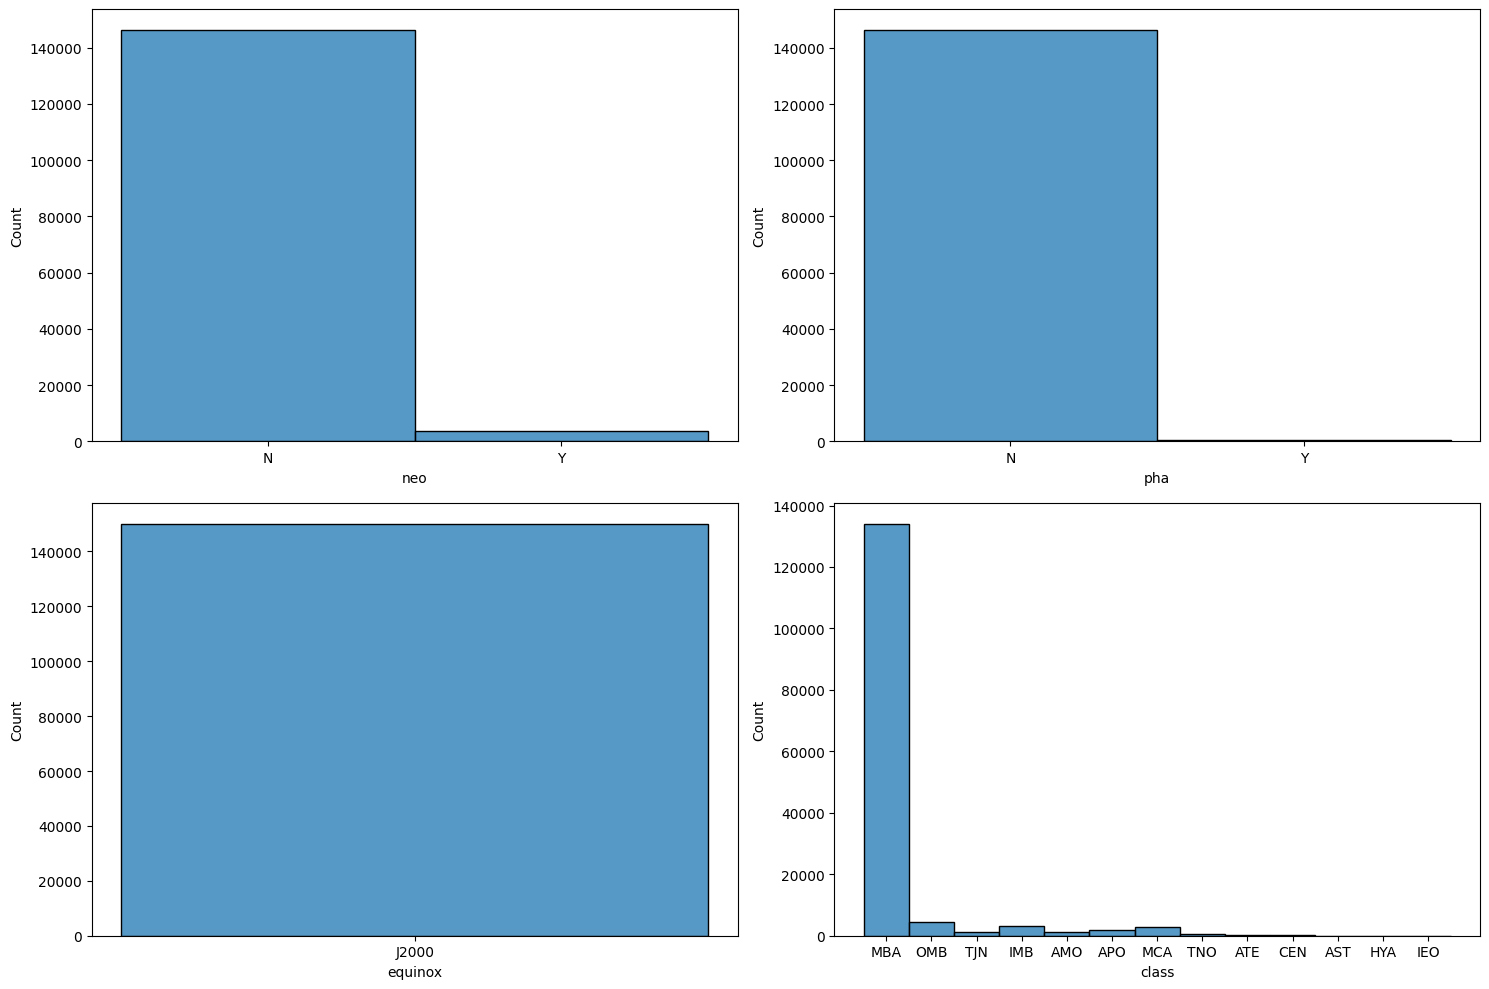

Conclusiones:

neo: la mayoría de objetos no son cercanos a la tierra

pha: la mayoría de objetos no son potencialmente peligroso

equinox:sólo existe una categoría, podemos eliminarla

class: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter


In [13]:
# Análisis variables categóricas 'neo', 'pha', 'equinox', 'class'
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Histograma múltiple
#"host_name" -> existen demasiados nombres como para crear hisograma

sns.histplot(ax = axis[0][0], data = sample_total_data, x = "neo")
sns.histplot(ax = axis[0][1], data = sample_total_data, x = "pha")
sns.histplot(ax = axis[1][0], data = sample_total_data, x = "equinox")
sns.histplot(ax = axis[1][1], data = sample_total_data, x = "class")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

print("Conclusiones:")
print("\nneo: la mayoría de objetos no son cercanos a la tierra")
print("\npha: la mayoría de objetos no son potencialmente peligroso")
print("\nequinox:sólo existe una categoría, podemos eliminarla")
print("\nclass: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter")



In [14]:
#   Eliminación de información irrelevante de variables categóricas, conclusión sacada de representación histograma
sample_total_data.drop(["equinox"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.139451,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


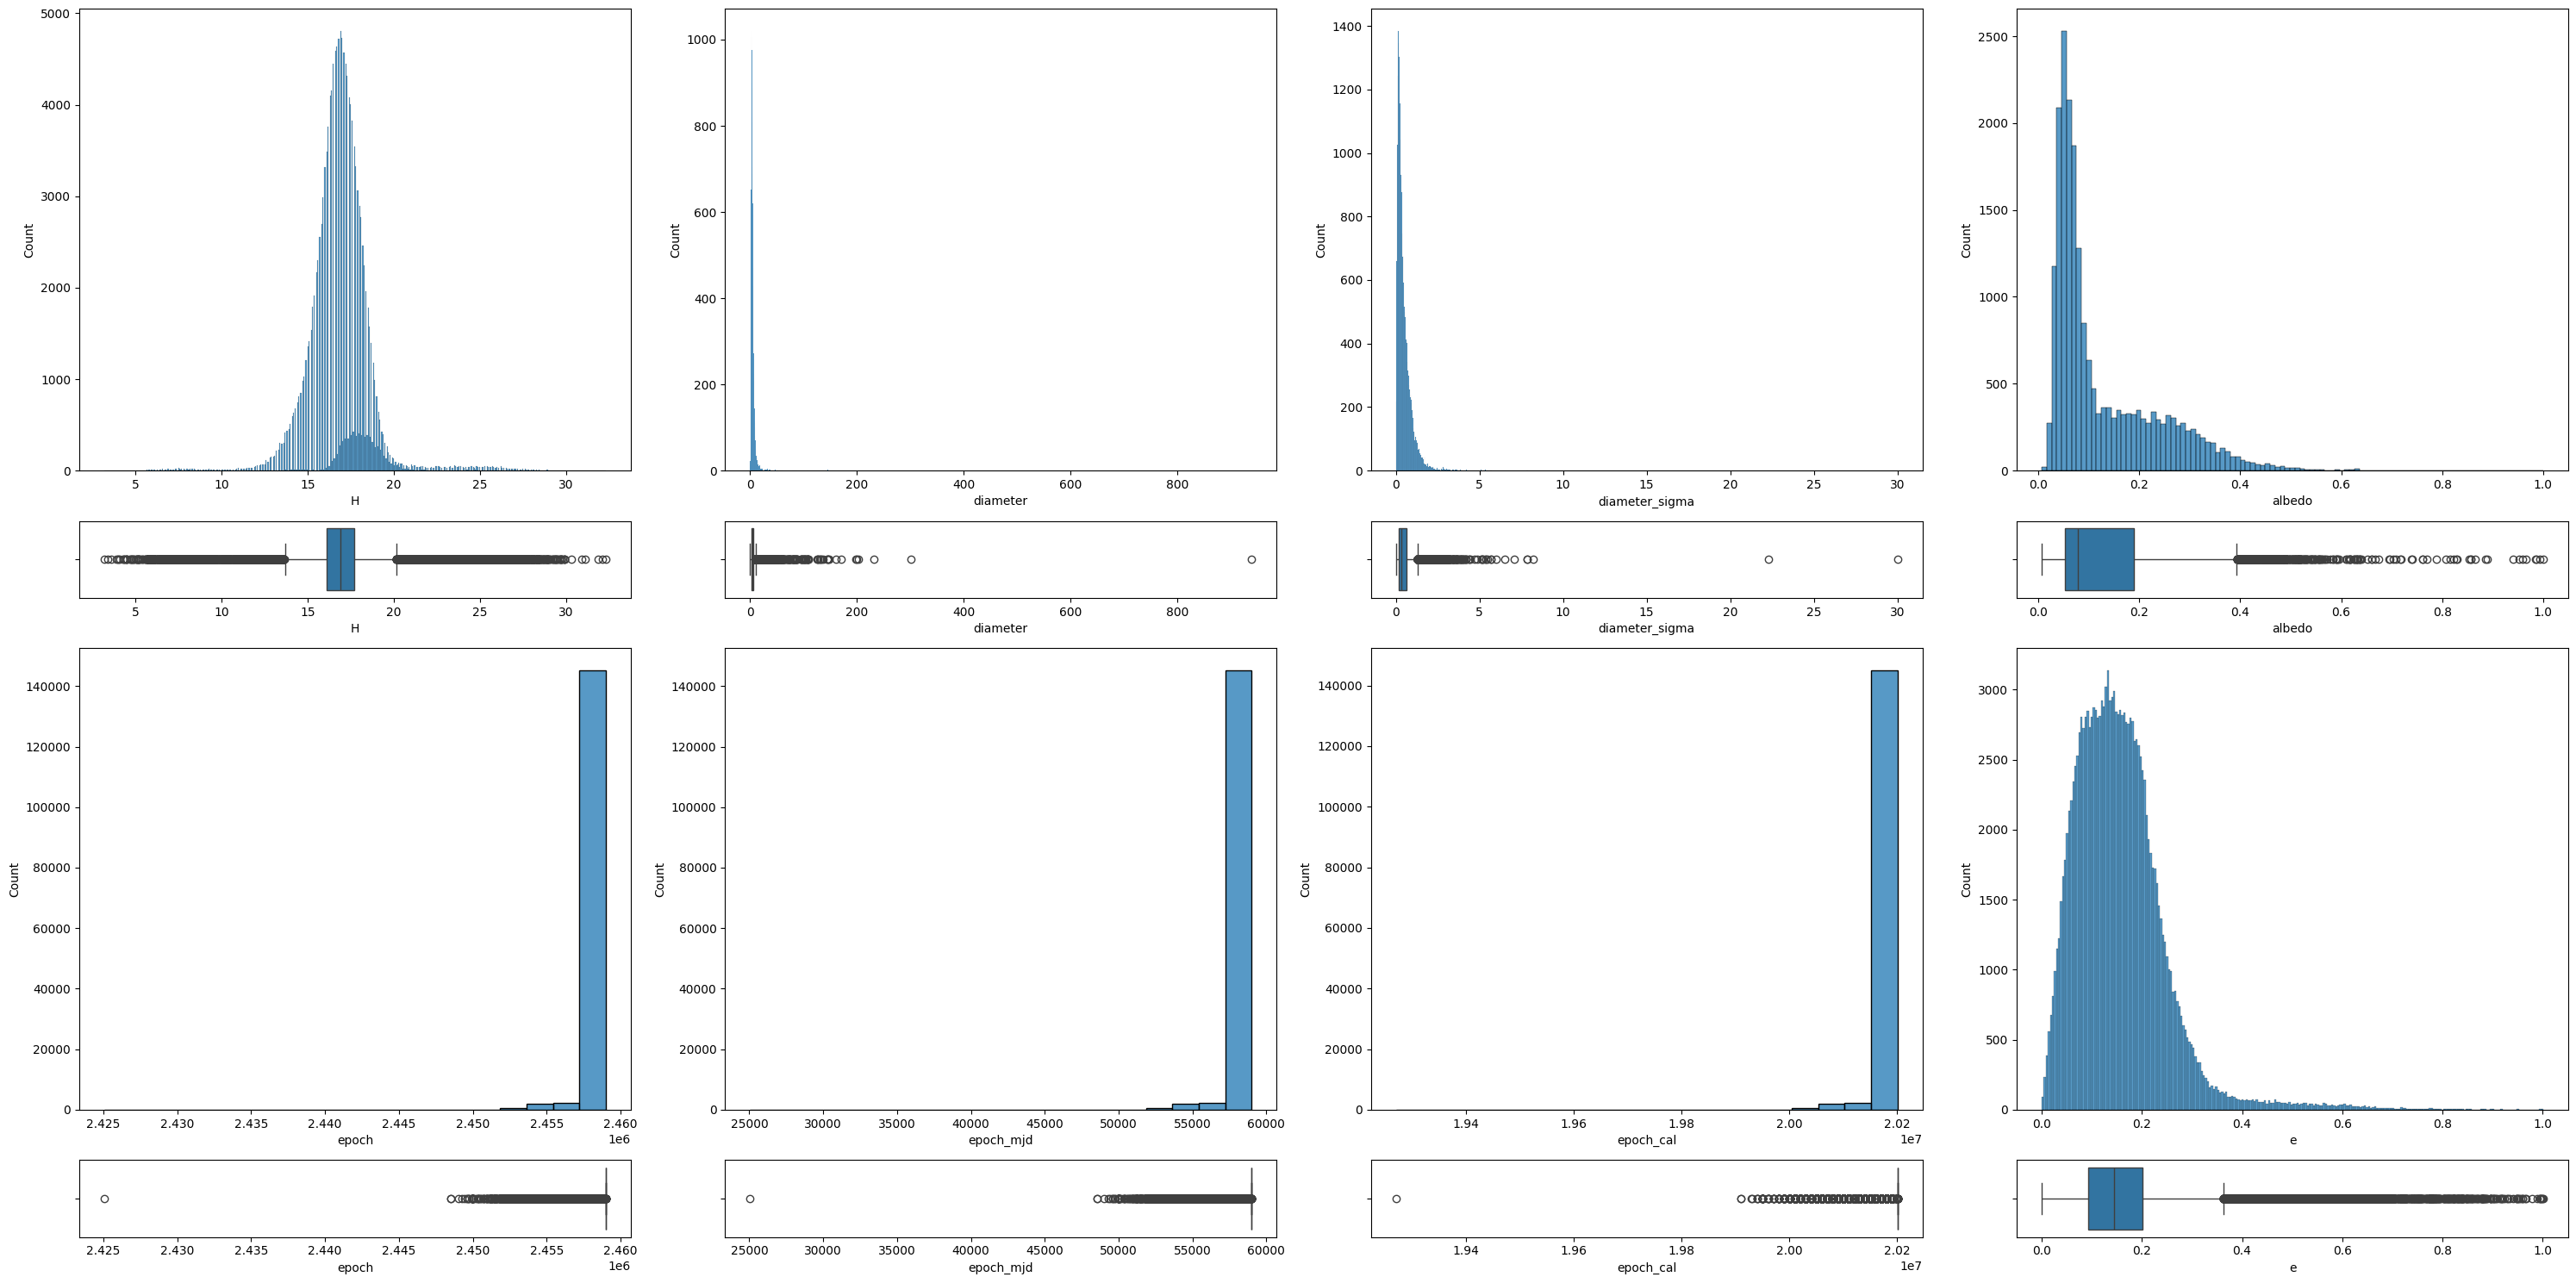

In [15]:
# Análisis univariante variables numéricas'H', 'diameter', 'diameter_sigma', 'albedo', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "H")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "H")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "diameter") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "diameter")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "diameter_sigma")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "diameter_sigma")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "albedo") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "albedo")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "epoch")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "epoch")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "epoch_mjd") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "epoch_mjd")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "epoch_cal")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "epoch_cal")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "e")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "e")

plt.tight_layout()

plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n'

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "a")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "a")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "q") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "q")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "i")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "i")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "om") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "om")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "w")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "w")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "ma") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "ma")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "ad")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "ad")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "n")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "n")

plt.tight_layout()

plt.show()

In [1]:
# Análisis numérico categórico (completo)
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(sample_total_data[['H', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Análisis de outliers
sample_total_data.describe()

,H,epoch_mjd,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,neo_n,pha_n,class_n
count,148974.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,149999.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.499990e+05,1.500000e+05,1.468250e+05,149981.000000,150000.000000,150000.000000,150000.000000
mean,16.908736,58869.816707,0.156194,3.066260,2.390097,9.046152,168.155184,181.771481,176.905455,3.842788,2.365181e-01,2.458855e+06,2.019578e+07,1.746864e+04,4.782621e+01,1.410026e+00,537.193051,0.024053,-0.019000,0.372167
std,1.785452,698.196586,0.093133,88.885797,2.095731,6.645731,102.929976,103.863407,105.861305,173.407580,7.875528e-02,1.550017e+03,4.254435e+04,5.780249e+06,1.582541e+04,2.113217e+00,817.504524,0.153259,0.151567,1.273898
min,3.200000,25051.000000,0.000008,-7520.984443,0.080744,0.049531,0.001562,0.001880,-0.000661,0.793855,1.608247e-07,2.394592e+06,1.844013e+07,1.511945e+02,0.000000e+00,4.544120e-07,0.000000,-1.000000,-1.000000,0.000000
25%,16.100000,59000.000000,0.092121,2.387398,1.971707,4.181390,80.165279,92.043588,83.351533,2.780959,1.894350e-01,2.458558e+06,2.019032e+07,1.347371e+03,3.688888e+00,9.798180e-01,375.358357,0.000000,0.000000,0.000000
50%,16.900000,59000.000000,0.144796,2.647045,2.227235,7.429595,159.377417,183.087206,174.761655,3.046301,2.288555e-01,2.458941e+06,2.020040e+07,1.573044e+03,4.306756e+00,1.241970e+00,478.033078,0.000000,0.000000,0.000000
75%,17.723000,59000.000000,0.200326,3.002583,2.577647,12.381569,252.076295,271.962899,269.670546,3.365158,2.671866e-01,2.459358e+06,2.021052e+07,1.900384e+03,5.202963e+00,1.592710e+00,616.939526,0.000000,0.000000,0.000000
max,32.300000,59000.000000,1.001173,33488.895955,80.398819,160.430921,359.997768,359.999646,491.618014,66972.796064,2.381039e+00,2.525117e+06,2.201061e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,1.000000,1.000000,12.000000


In [ ]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)

pha          3175
moid         3175
H            1026
moid_ld        19
neo             1
per             1
ad              1
q               0
e               0
pha_n           0
neo_n           0
class           0
epoch_mjd       0
equinox         0
per_y           0
tp_cal          0
i               0
tp              0
n               0
a               0
ma              0
w               0
om              0
class_n         0
dtype: int64

In [ ]:
# Valores faltantes en porcentaje
sample_total_data.isnull().sum().sort_values(ascending=False) / len(full_df)

pha          0.003312
moid         0.003312
H            0.001070
moid_ld      0.000020
neo          0.000001
per          0.000001
ad           0.000001
q            0.000000
e            0.000000
pha_n        0.000000
neo_n        0.000000
class        0.000000
epoch_mjd    0.000000
equinox      0.000000
per_y        0.000000
tp_cal       0.000000
i            0.000000
tp           0.000000
n            0.000000
a            0.000000
ma           0.000000
w            0.000000
om           0.000000
class_n      0.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular outliers utilizando el rango intercuartílico (IQR)
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Variables específicas para el cálculo de outliers
variables = ['H', 'epoch_mjd', 'e']

# Calcular y mostrar los outliers para cada variable
for col in variables:
    outliers = calculate_outliers(sample_total_data, col)
    print(f'Outliers en la variable {col}:')
    print(outliers[[col]])
    print(f'Número de outliers en {col}: {len(outliers)}\n')

Outliers en la variable H:
             H
310106  12.900
560127  20.900
957169  24.478
9095    12.200
718779   6.400
...        ...
6399    11.900
2481    12.800
811832   6.900
31339   12.600
630741  24.900

[6924 rows x 1 columns]
Número de outliers en H: 6924

Outliers en la variable epoch_mjd:
        epoch_mjd
685599      55480
957169      58869
678593      55371
768197      56720
546199      50959
...           ...
710776      55855
938627      58339
582452      53565
669049      55242
779823      56855

[7668 rows x 1 columns]
Número de outliers en epoch_mjd: 7668

Outliers en la variable e:
               e
560127  0.418894
957169  0.389314
718779  0.446823
946283  0.461911
917571  0.455330
...          ...
582452  0.472513
925301  0.456401
779823  0.454276
162997  0.474978
630741  0.378538

[3966 rows x 1 columns]
Número de outliers en e: 3966



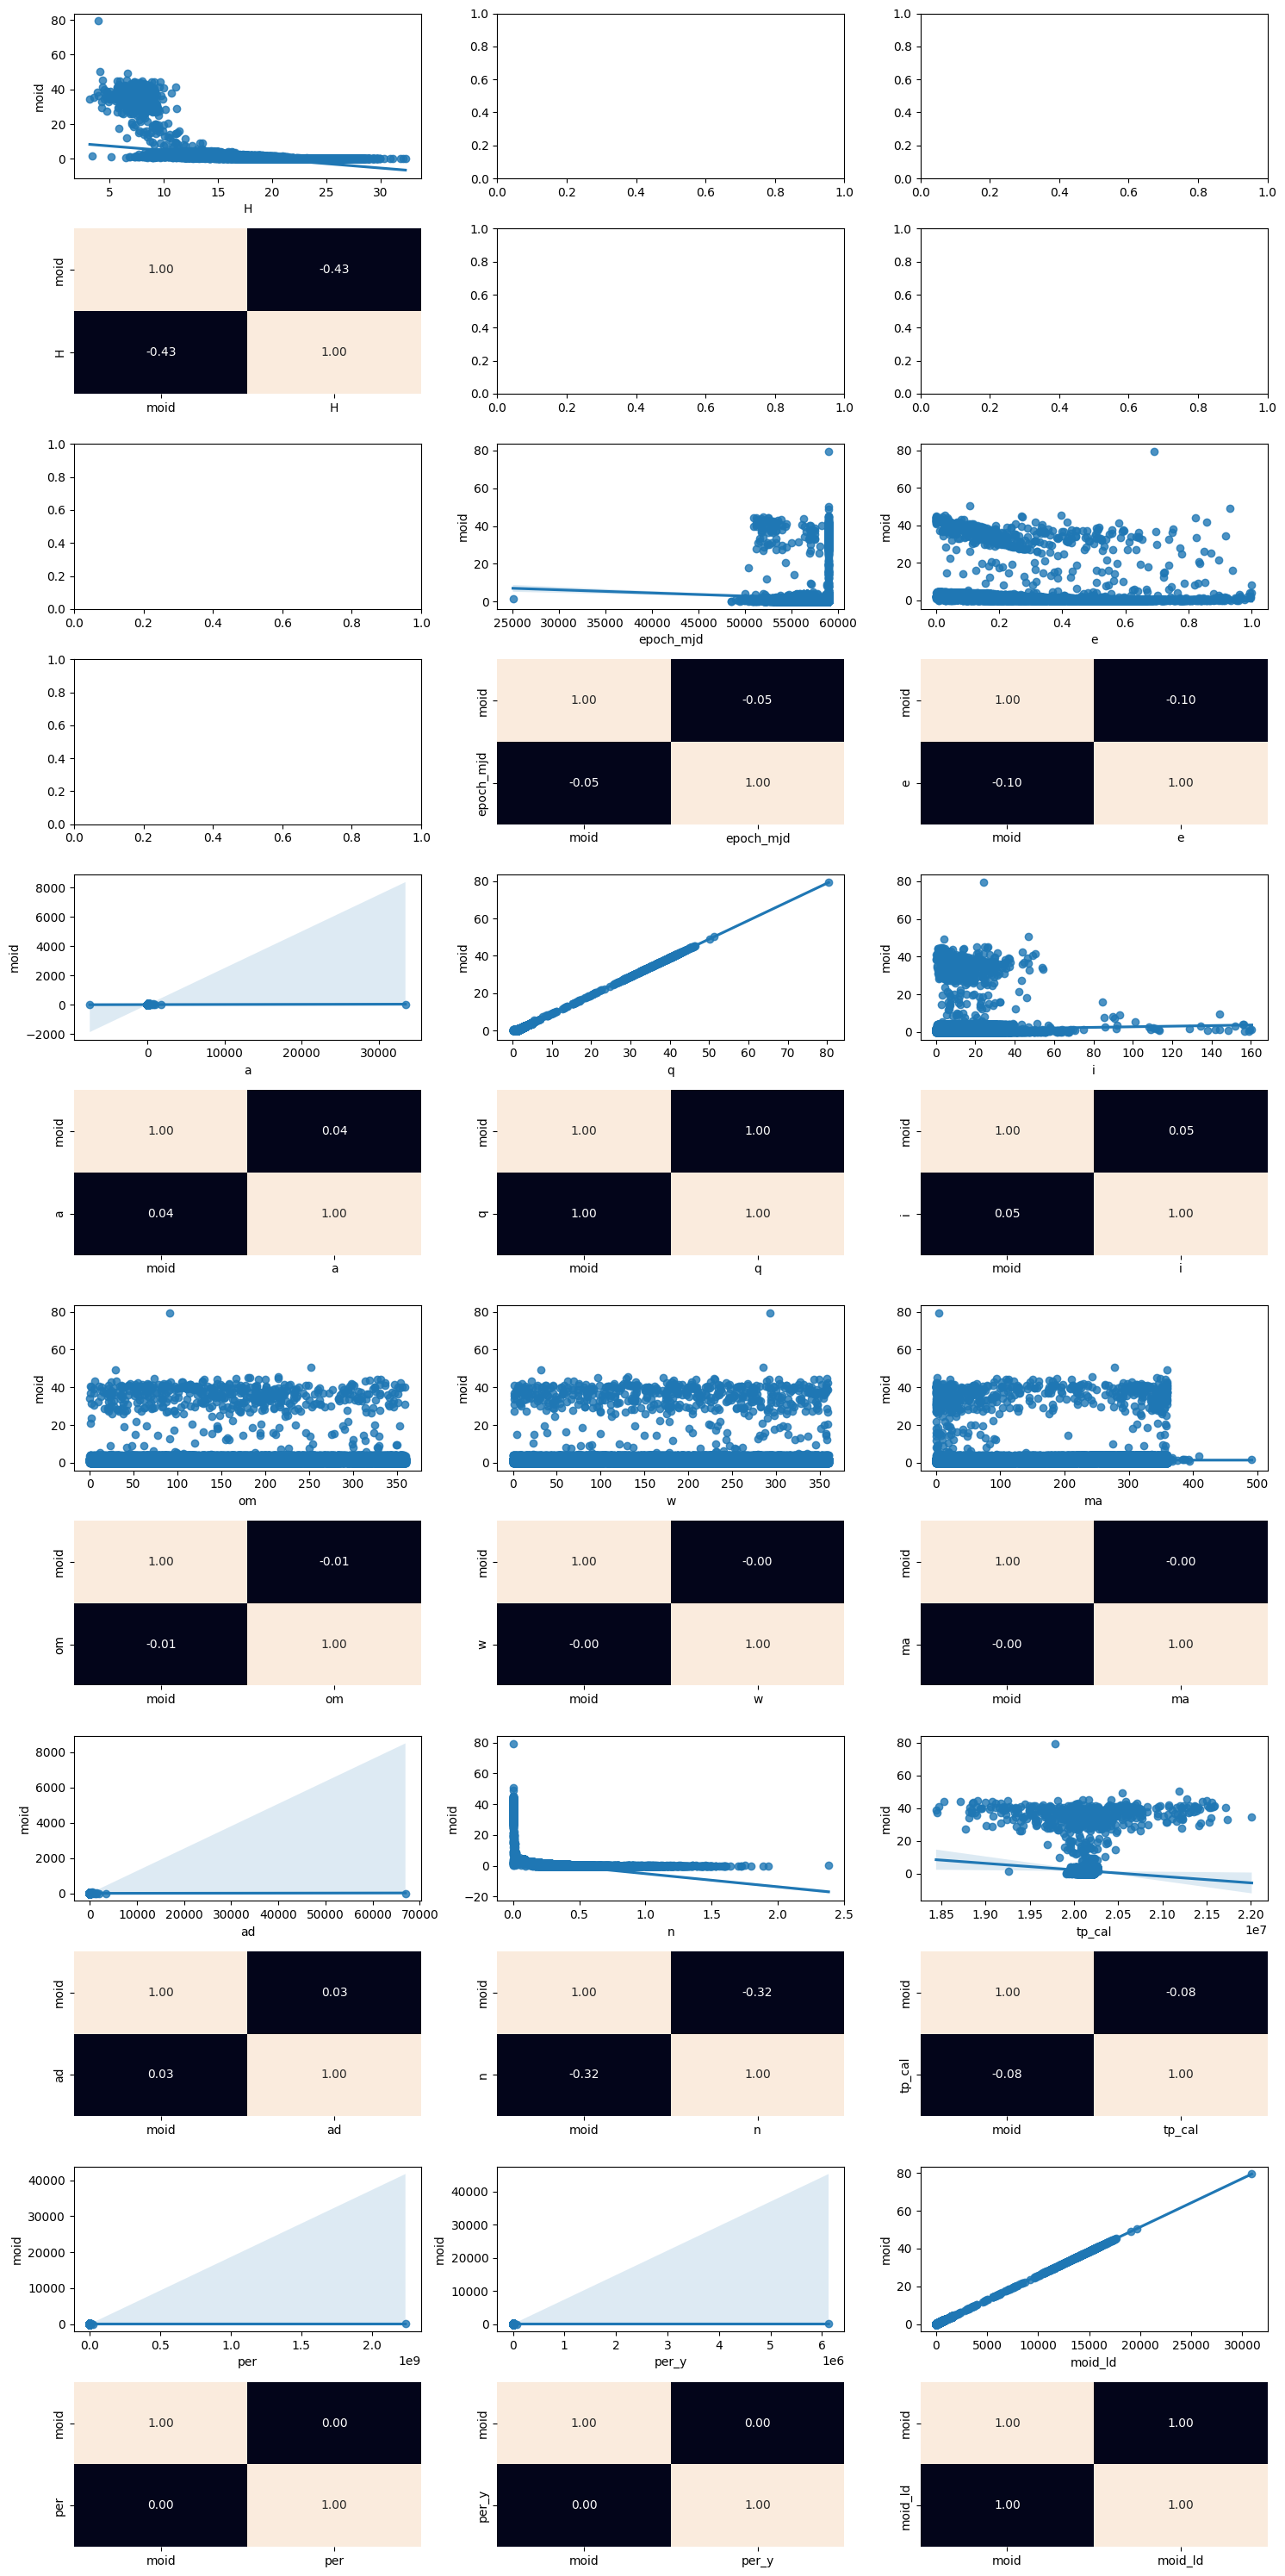

In [ ]:
# Analisis numerico - numerico

#H', 'diameter', 'albedo', 'diameter_sigma', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'neo_n', 'pha_n', 'class_n'

import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(12, 3, figsize=(15, 30))
#Create scatter plots and heatmaps
sns.regplot(data=sample_total_data, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_total_data[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_total_data, x="epoch_mjd", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_total_data[["moid", "epoch_mjd"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_total_data, x="e", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_total_data[["moid", "e"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_total_data, x="a", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_total_data[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_total_data, x="q", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_total_data[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_total_data, x="i", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_total_data[["moid", "i"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)

sns.regplot(data=sample_total_data, x="om", y="moid", ax=axis[6, 0]) 
sns.heatmap(sample_total_data[["moid", "om"]].corr(), annot=True, fmt=".2f", ax=axis[7, 0], cbar=False)

sns.regplot(data=sample_total_data, x="w", y="moid", ax=axis[6, 1]) 
sns.heatmap(sample_total_data[["moid", "w"]].corr(), annot=True, fmt=".2f", ax=axis[7, 1], cbar=False)

sns.regplot(data=sample_total_data, x="ma", y="moid", ax=axis[6, 2]) 
sns.heatmap(sample_total_data[["moid", "ma"]].corr(), annot=True, fmt=".2f", ax=axis[7, 2], cbar=False)

sns.regplot(data=sample_total_data, x="ad", y="moid", ax=axis[8, 0]) 
sns.heatmap(sample_total_data[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[9, 0], cbar=False)

sns.regplot(data=sample_total_data, x="n", y="moid", ax=axis[8, 1]) 
sns.heatmap(sample_total_data[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[9, 1], cbar=False)

sns.regplot(data=sample_total_data, x="tp_cal", y="moid", ax=axis[8, 2]) 
sns.heatmap(sample_total_data[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[9, 2], cbar=False)

sns.regplot(data=sample_total_data, x="per", y="moid", ax=axis[10, 0]) 
sns.heatmap(sample_total_data[["moid", "per"]].corr(), annot=True, fmt=".2f", ax=axis[11, 0], cbar=False)

sns.regplot(data=sample_total_data, x="per_y", y="moid", ax=axis[10, 1]) 
sns.heatmap(sample_total_data[["moid", "per_y"]].corr(), annot=True, fmt=".2f", ax=axis[11, 1], cbar=False)

sns.regplot(data=sample_total_data, x="moid_ld", y="moid", ax=axis[10, 2]) 
sns.heatmap(sample_total_data[["moid", "moid_ld"]].corr(), annot=True, fmt=".2f", ax=axis[11, 2], cbar=False)

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

In [ ]:
#   Eliminación de información irrelevante de variables numéricas -> 'per' y 'moid_Id' por ser información irrelevante, las demás por no tener correlación
sample_total_data.drop(["per","moid_ld", "epoch_mjd","e", "i", "om", "w", "ma", "tp"], axis = 1, inplace = True)
sample_total_data.head()

,neo,pha,H,equinox,a,q,ad,n,tp_cal,per_y,moid,class,neo_n,pha_n,class_n
323650,N,N,18.2,J2000,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,MBA,0,0,0
571724,N,N,17.7,J2000,2.572391,1.939743,3.205039,0.238890,2.020052e+07,4.125852,0.971108,MBA,0,0,0
395983,N,N,17.4,J2000,2.714802,2.408359,3.021245,0.220342,2.021012e+07,4.473171,1.414550,MBA,0,0,0
235862,N,N,15.1,J2000,3.113143,2.567578,3.658708,0.179434,2.022061e+07,5.492964,1.582170,MBA,0,0,0
651830,N,N,17.3,J2000,2.753819,2.254477,3.253162,0.215676,2.022073e+07,4.569949,1.276680,MBA,0,0,0


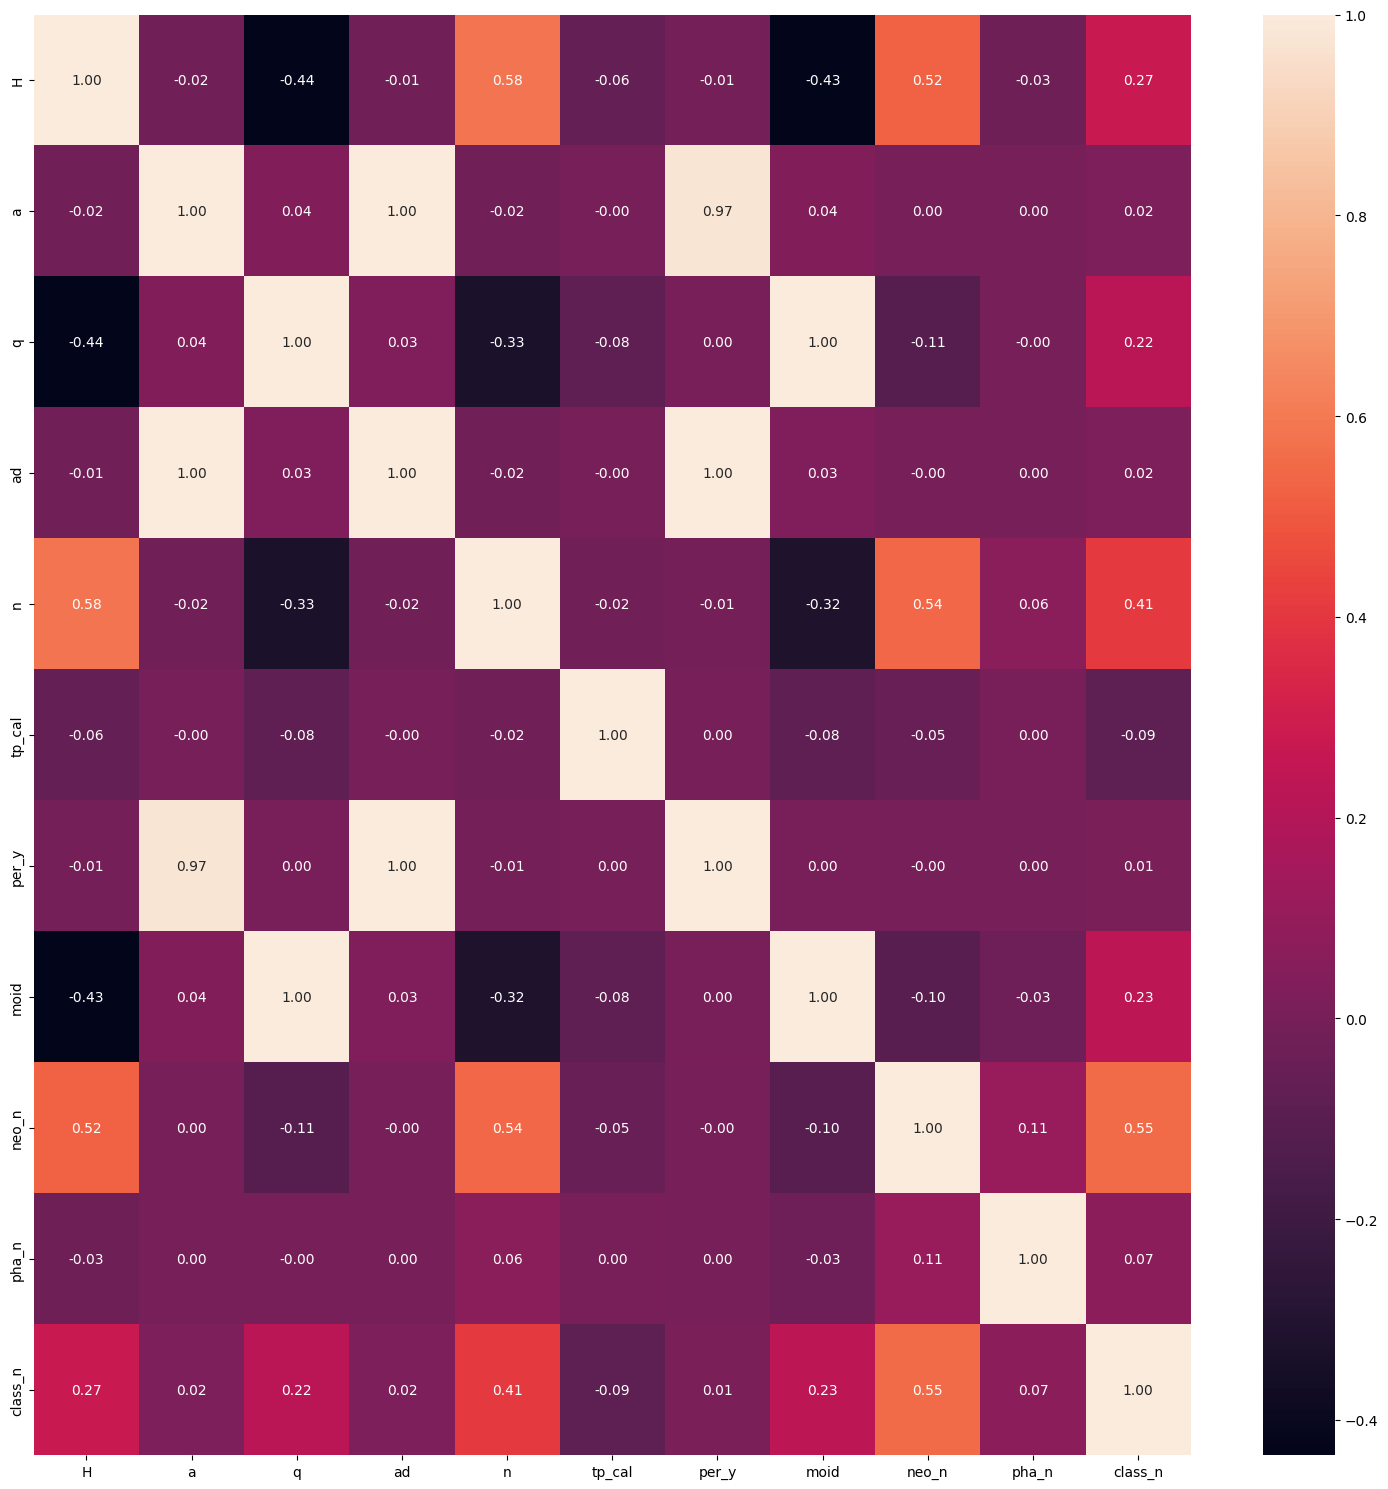

In [ ]:
# Análisis numérico categórico (completo)
fig, axis = plt.subplots(figsize = (15, 15))
sns.heatmap(sample_total_data[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()


Análisis descriptivo de la variable a:
count    150000.000000
mean          3.066260
std          88.885797
min       -7520.984443
25%           2.387398
50%           2.647045
75%           3.002583
max       33488.895955
Name: a, dtype: float64
Número de outliers en a: 3773
Valores límite inferior y superior para a: 1.4646212686883362, 3.925359806880134
Outliers en a:
                 a
317050   3.981956
344005   5.205284
352665   5.164403
310106   5.179891
506360   3.954158
...           ...
808245   5.255092
956825   1.411459
138910   1.349599
811832  55.543316
630741   1.298032

[3773 rows x 1 columns]


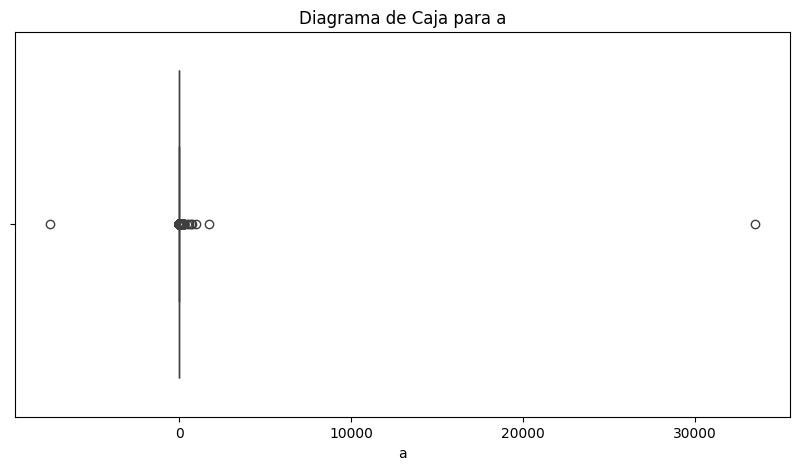


Análisis descriptivo de la variable q:
count    150000.000000
mean          2.390097
std           2.095731
min           0.080744
25%           1.971707
50%           2.227235
75%           2.577647
max          80.398819
Name: q, dtype: float64
Número de outliers en q: 4552
Valores límite inferior y superior para q: 1.0627975089040398, 3.486556916570909
Outliers en q:
                 q
344005   4.382544
352665   5.075118
310106   4.567244
957169   0.784234
556501   4.926126
...           ...
956825   1.034694
582452   0.865850
162997   1.010793
811832  37.376432
630741   0.806677

[4552 rows x 1 columns]


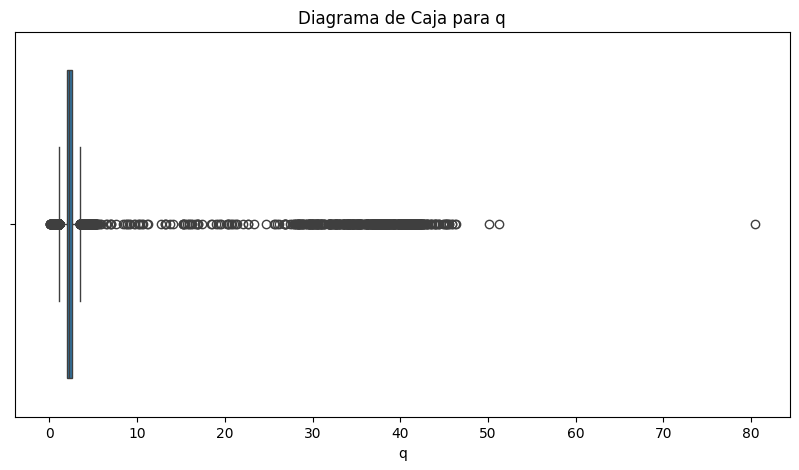


Análisis descriptivo de la variable ad:
count    149999.000000
mean          3.842788
std         173.407580
min           0.793855
25%           2.780959
50%           3.046301
75%           3.365158
max       66972.796064
Name: ad, dtype: float64
Número de outliers en ad: 4600
Valores límite inferior y superior para ad: 1.9046592439617078, 4.241457771977233
Outliers en ad:
                ad
317050   4.744743
344005   6.028024
352665   5.253688
310106   5.792538
506360   5.233820
...           ...
952242   4.544455
956825   1.788223
138910   1.459649
811832  73.710200
630741   1.789386

[4600 rows x 1 columns]


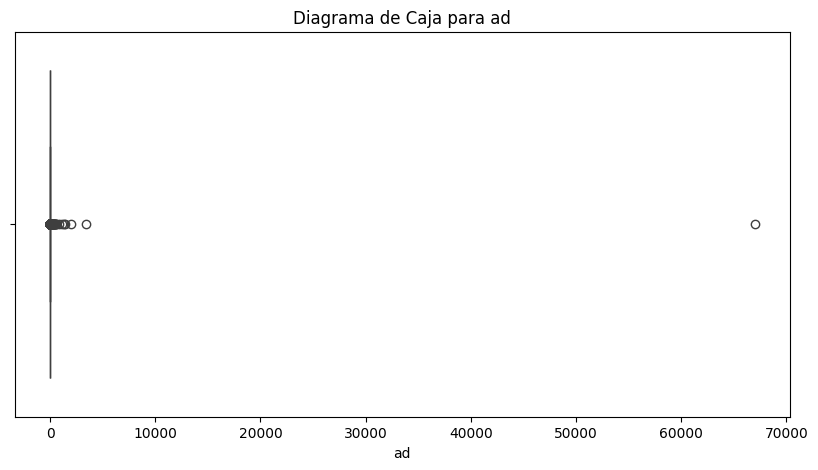


Análisis descriptivo de la variable n:
count    1.500000e+05
mean     2.365181e-01
std      7.875528e-02
min      1.608247e-07
25%      1.894350e-01
50%      2.288555e-01
75%      2.671866e-01
max      2.381039e+00
Name: n, dtype: float64
Número de outliers en n: 3693
Valores límite inferior y superior para n: 0.07280757125599227, 0.3838140870747787
Outliers en n:
                n
957169  0.677272
718779  0.001724
946283  0.404291
546199  0.003244
823071  0.433098
...          ...
138910  0.628632
582452  0.468660
811832  0.002381
630741  0.666463
400384  0.386779

[3693 rows x 1 columns]


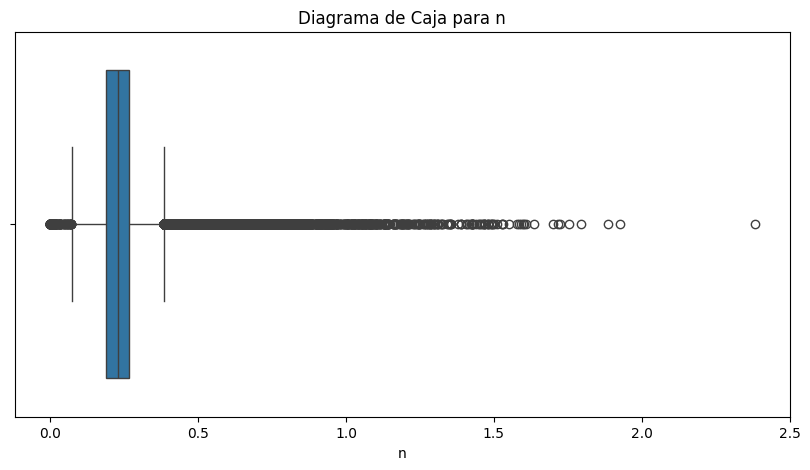

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables específicas para el análisis
variables = ['a', 'q', 'ad', 'n']

# Función para calcular outliers utilizando el rango intercuartílico (IQR)
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis descriptivo y gráficos de caja
for col in variables:
    print(f'\nAnálisis descriptivo de la variable {col}:')
    print(sample_total_data[col].describe())
    
    # Calcular y mostrar outliers
    outliers, lower_bound, upper_bound = calculate_outliers(sample_total_data, col)
    print(f'Número de outliers en {col}: {len(outliers)}')
    print(f'Valores límite inferior y superior para {col}: {lower_bound}, {upper_bound}')
    print(f'Outliers en {col}:\n', outliers[[col]])
    
    # Crear el gráfico de caja
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sample_total_data[col])
    plt.title(f'Diagrama de Caja para {col}')
    plt.show()



In [ ]:
# Análisis de outliers
sample_total_data.describe()

,H,a,q,ad,n,tp_cal,per_y,moid,neo_n,pha_n,class_n
count,148974.000000,150000.000000,150000.000000,149999.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.468250e+05,150000.000000,150000.000000,150000.000000
mean,16.908736,3.066260,2.390097,3.842788,2.365181e-01,2.019578e+07,4.782621e+01,1.410026e+00,0.024053,-0.019000,0.372167
std,1.785452,88.885797,2.095731,173.407580,7.875528e-02,4.254435e+04,1.582541e+04,2.113217e+00,0.153259,0.151567,1.273898
min,3.200000,-7520.984443,0.080744,0.793855,1.608247e-07,1.844013e+07,0.000000e+00,4.544120e-07,-1.000000,-1.000000,0.000000
25%,16.100000,2.387398,1.971707,2.780959,1.894350e-01,2.019032e+07,3.688888e+00,9.798180e-01,0.000000,0.000000,0.000000
50%,16.900000,2.647045,2.227235,3.046301,2.288555e-01,2.020040e+07,4.306756e+00,1.241970e+00,0.000000,0.000000,0.000000
75%,17.723000,3.002583,2.577647,3.365158,2.671866e-01,2.021052e+07,5.202963e+00,1.592710e+00,0.000000,0.000000,0.000000
max,32.300000,33488.895955,80.398819,66972.796064,2.381039e+00,2.201061e+07,6.128574e+06,7.947660e+01,1.000000,1.000000,12.000000


In [ ]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)

pha        3175
moid       3175
H          1026
neo           1
ad            1
equinox       0
a             0
q             0
n             0
tp_cal        0
per_y         0
class         0
neo_n         0
pha_n         0
class_n       0
dtype: int64

In [ ]:
# Valores faltantes en porcentaje
sample_total_data.isnull().sum().sort_values(ascending=False) / len(full_df)

pha        0.003312
moid       0.003312
H          0.001070
neo        0.000001
ad         0.000001
equinox    0.000000
a          0.000000
q          0.000000
n          0.000000
tp_cal     0.000000
per_y      0.000000
class      0.000000
neo_n      0.000000
pha_n      0.000000
class_n    0.000000
dtype: float64

Analyzing a...
  Mean: 3.07
  Median: 2.65
  75th percentile: 3.00
  Number of outliers: 3773 (2.52%)


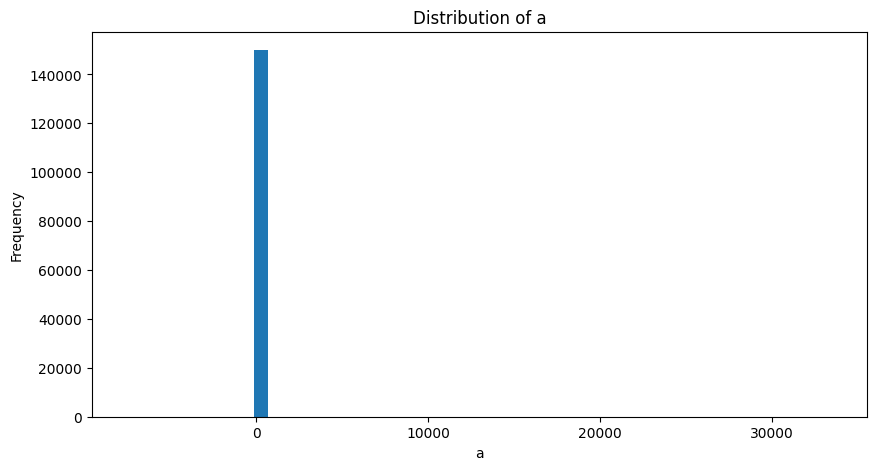

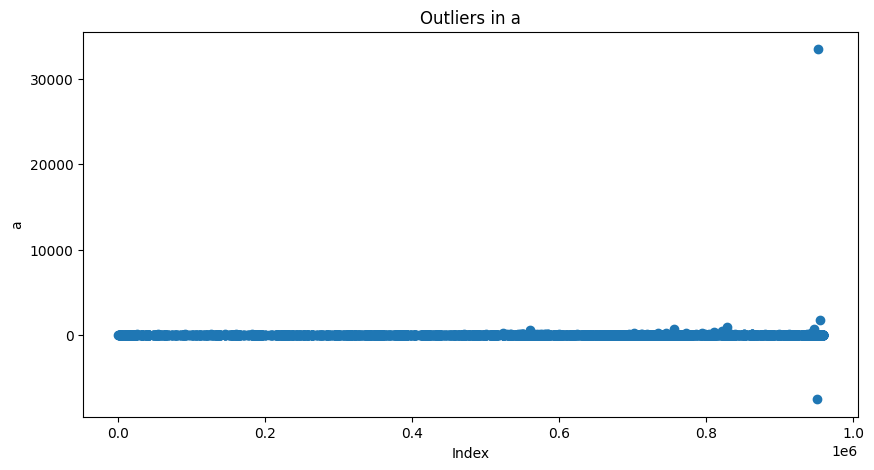

Analyzing q...
  Mean: 2.39
  Median: 2.23
  75th percentile: 2.58
  Number of outliers: 4552 (3.03%)


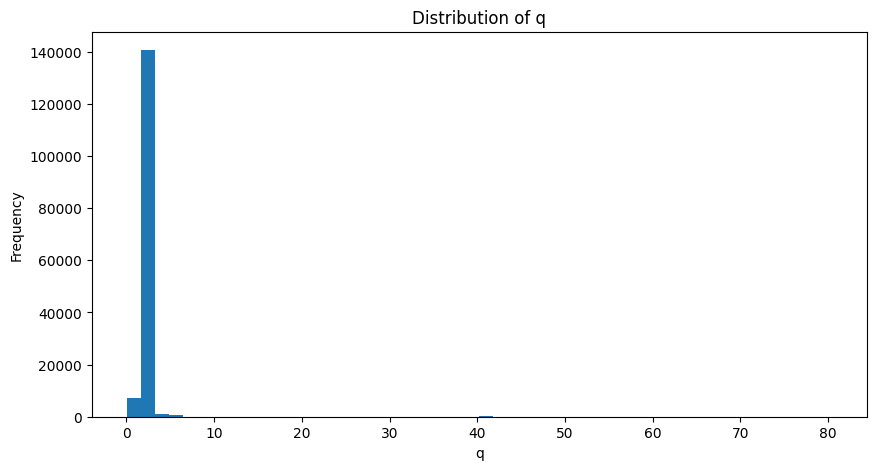

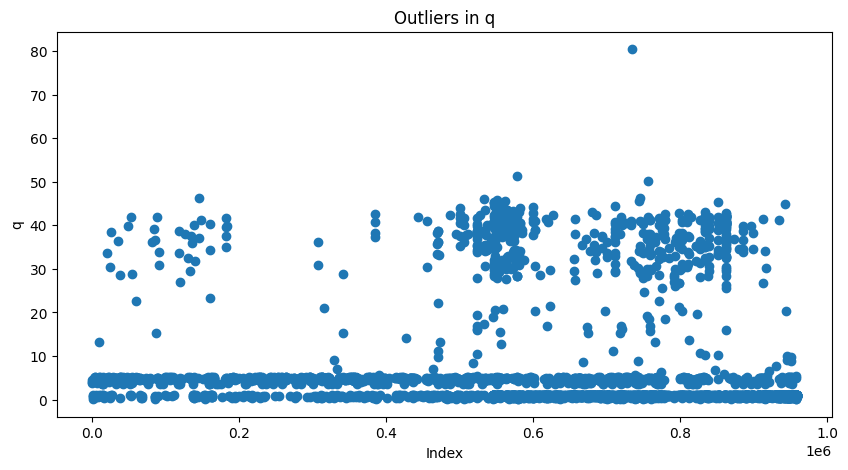

Analyzing ad...
  Mean: 3.84
  Median: 3.05
  75th percentile: nan
  Number of outliers: 0 (0.00%)


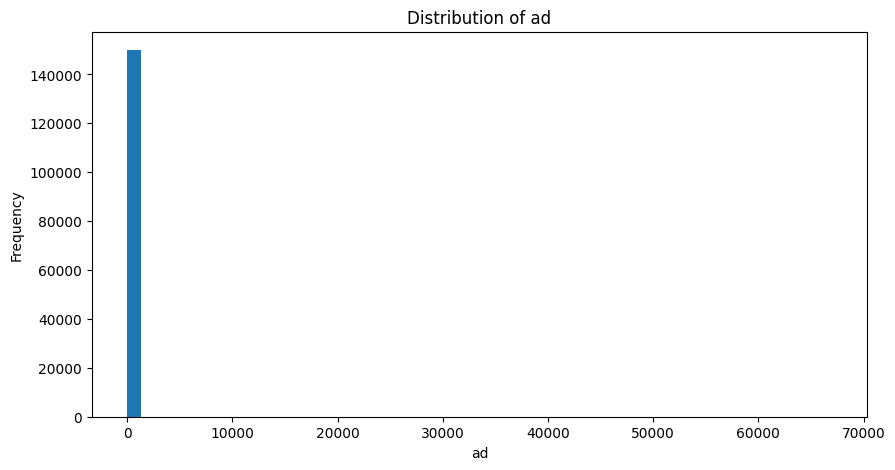

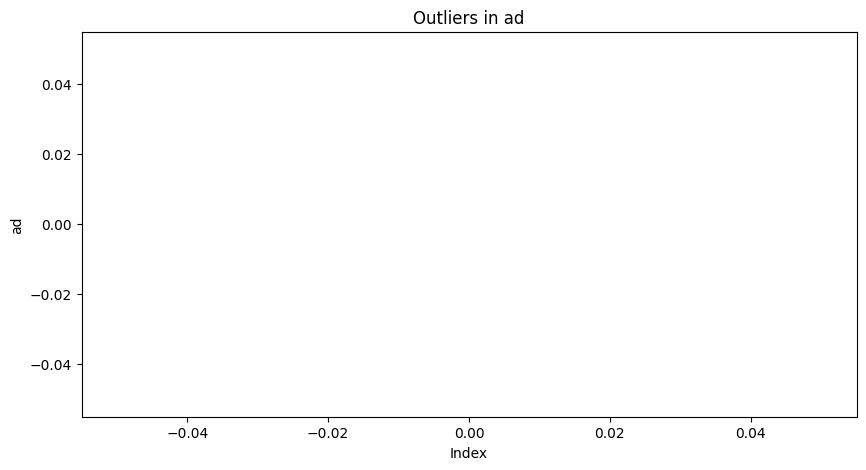

Analyzing n...
  Mean: 0.24
  Median: 0.23
  75th percentile: 0.27
  Number of outliers: 3693 (2.46%)


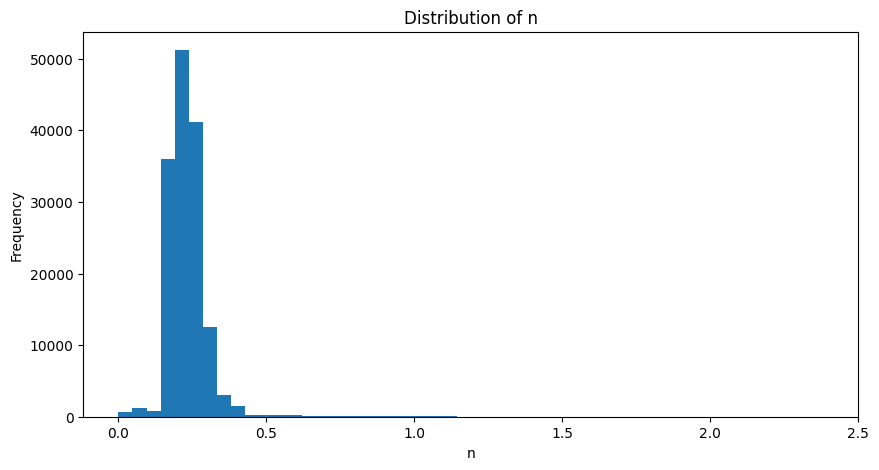

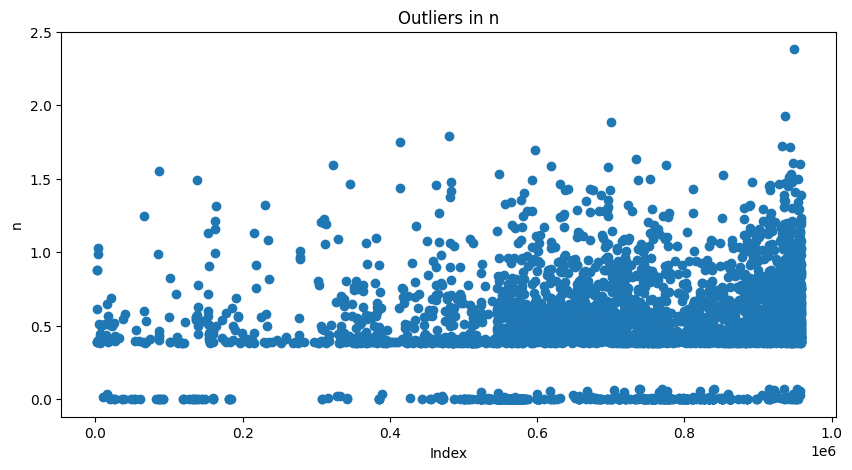

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define las variables a analizar
vars_to_analyze = ['a', 'q', 'ad', 'n']

# Función para detectar outliers
def detect_outliers(df, var, threshold=1.5):
    q75, q25 = np.percentile(df[var], [75, 25])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    return outliers

# Analiza cada variable
for var in vars_to_analyze:
    print(f"Analyzing {var}...")
    
    # Detecta outliers
    outliers = detect_outliers(sample_total_data, var, 1.5)
    
    # Imprime estadísticas
    print(f"  Mean: {sample_total_data[var].mean():.2f}")
    print(f"  Median: {sample_total_data[var].median():.2f}")
    print(f"  75th percentile: {np.percentile(sample_total_data[var], 75):.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers) / len(sample_total_data) * 100:.2f}%)")
    
    # Grafica la distribución de la variable
    plt.figure(figsize=(10, 5))
    plt.hist(sample_total_data[var], bins=50)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()
    
    # Grafica los outliers
    plt.figure(figsize=(10, 5))
    plt.scatter(outliers.index, outliers[var])
    plt.title(f"Outliers in {var}")
    plt.xlabel("Index")
    plt.ylabel(var)
    plt.show()

a, q , n y ad tienen valores atípicos: los valores máximos para estas variables son significativamente más altos que los valores del percentil 75, lo que indica la presencia de valores atípicos. Estos valores atípicos pueden deberse a errores en la medición o a que son asteroides considerablemente grandes por lo cual se consideran validos.
Los valores atípicos son raros: el porcentaje de valores atípicos en cada variable es relativamente pequeño y oscila entre el 0,008% y el 0,014% del total de puntos de datos.
Se necesita más investigación: para determinar la causa de estos valores atípicos,.

In [ ]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)

pha        3175
moid       3175
H          1026
neo           1
ad            1
equinox       0
a             0
q             0
n             0
tp_cal        0
per_y         0
class         0
neo_n         0
pha_n         0
class_n       0
dtype: int64

In [ ]:
# Valores faltantes en porcentaje
sample_total_data.isnull().sum().sort_values(ascending=False) / len(full_df)

pha        0.003312
moid       0.003312
H          0.001070
neo        0.000001
ad         0.000001
equinox    0.000000
a          0.000000
q          0.000000
n          0.000000
tp_cal     0.000000
per_y      0.000000
class      0.000000
neo_n      0.000000
pha_n      0.000000
class_n    0.000000
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona solo las columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=[np.number]).columns

# Inicializa el escalador
scaler = MinMaxScaler()

# Aplica el escalador a las columnas numéricas
sample_total_data[numeric_columns] = scaler.fit_transform(sample_total_data[numeric_columns])

print("Data después de la normalización:")
print(sample_total_data.head())

Data después de la normalización:
       neo pha         H equinox         a         q        ad         n  \
323650   N   N  0.515464   J2000  0.183450  0.023304  0.000027  0.121121   
571724   N   N  0.498282   J2000  0.183457  0.023145  0.000036  0.100330   
395983   N   N  0.487973   J2000  0.183461  0.028980  0.000033  0.092540   
235862   N   N  0.408935   J2000  0.183470  0.030962  0.000043  0.075360   
651830   N   N  0.484536   J2000  0.183462  0.027064  0.000037  0.090580   

          tp_cal         per_y      moid class  neo_n  pha_n  class_n  
323650  0.487551  5.576546e-07  0.012180   MBA    0.5    0.5      0.0  
571724  0.493040  6.732157e-07  0.012219   MBA    0.5    0.5      0.0  
395983  0.495729  7.298877e-07  0.017798   MBA    0.5    0.5      0.0  
235862  0.498669  8.962874e-07  0.019907   MBA    0.5    0.5      0.0  
651830  0.498701  7.456790e-07  0.016064   MBA    0.5    0.5      0.0  


# resultados de la normalización:

Equinoccio H:medida astronómica relacionada con la época del año, ya que "equinoccio" se refiere al momento en que el día y la noche tienen la misma duración. Los valores normalizados sugieren una distribución bastante uniforme entre los puntos de datos.

a:relacionado con el semieje mayor de una órbita, que determina el tamaño de una órbita elíptica. Los valores normalizados sugieren un rango bastante estrecho alrededor de 0,183, lo que indica un tamaño de órbitas relativamente consistente.

q: distancia del perihelio, el punto más cercano de la órbita de un objeto al sol. Los valores normalizados muestran un rango más diverso que 'a', lo que implica una variación más amplia en los puntos más cercanos de las órbitas.

anuncio:distancia del afelio, el punto más alejado de la órbita de un objeto del sol. Los valores normalizados sugieren un rango muy pequeño cercano a 0, indicando variaciones mínimas en los puntos más alejados de las órbitas.

n:período orbital del objeto. Los valores normalizados sugieren una amplia gama de períodos orbitales, y algunas órbitas tardan mucho más en completarse que otras.

tp_cal:momento del perihelio, el momento en el que un objeto está más cerca del sol. Los valores normalizados muestran un rango relativamente consistente, lo que indica un momento similar de los eventos del perihelio.

per_y:período de la órbita del objeto, probablemente medido en años. Los valores normalizados indican una amplia gama de períodos orbitales, lo que potencialmente resalta una población diversa de objetos con diferentes períodos.

moid: Distancia mínima de intersección de la órbita, que indica la máxima aproximación del objeto a la Tierra. Los valores normalizados muestran un amplio rango, lo que indica un conjunto diverso de objetos con diferentes aproximaciones a la Tierra.

clase: variable categórica que representa el tipo de objeto (p. ej., asteroide, cometa). Los valores normalizados muestran que todos los objetos pertenecen a la clase "MBA", lo que sugiere un enfoque en los asteroides del cinturón principal en el conjunto de datos.

In [ ]:
# estanadarización para futuras decisiones ( de borrar siempre estamos a tiempo)

from sklearn.preprocessing import StandardScaler

# Selecciona solo las columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=[np.number]).columns

# Inicializa el escalador
scaler = StandardScaler()

# Aplica el escalador a las columnas numéricas
sample_total_data[numeric_columns] = scaler.fit_transform(sample_total_data[numeric_columns])

print("Data después de la estandarización:")
print(sample_total_data.head())

Data después de la estandarización:
       neo pha         H equinox         a         q        ad         n  \
323650   N   N  0.723216   J2000 -0.008971 -0.208814 -0.007252  0.658710   
571724   N   N  0.443174   J2000 -0.005556 -0.214892 -0.003678  0.030121   
395983   N   N  0.275149   J2000 -0.003954  0.008714 -0.004738 -0.205401   
235862   N   N -1.013044   J2000  0.000527  0.084687 -0.001062 -0.724827   
651830   N   N  0.219141   J2000 -0.003515 -0.064713 -0.003400 -0.264651   

          tp_cal     per_y      moid class     neo_n     pha_n   class_n  
323650 -0.349353 -0.002806 -0.209162   MBA -0.156946  0.125358 -0.292149  
571724  0.111306 -0.002761 -0.207702   MBA -0.156946  0.125358 -0.292149  
395983  0.336995 -0.002739  0.002141   MBA -0.156946  0.125358 -0.292149  
235862  0.583712 -0.002675  0.081461   MBA -0.156946  0.125358 -0.292149  
651830  0.586464 -0.002733 -0.063101   MBA -0.156946  0.125358 -0.292149  


# comentarios sobre la estandarización:

Tendencias y patrones

Neo: La columna neo tiene una distribución relativamente uniforme, con valores estandarizados entre -1 y 1. Esto sugiere que no hay una tendencia clara en esta columna.
Pha: La columna pha tiene una distribución ligeramente sesgada hacia la derecha, con valores estandarizados entre -1 y 2. Esto sugiere que hay una tendencia hacia valores más altos en esta columna.
Moid: La columna moid tiene una distribución relativamente uniforme, con valores estandarizados entre -1 y 1. Esto sugiere que no hay una tendencia clara en esta columna.
Class: La columna class tiene una distribución ligeramente sesgada hacia la izquierda, con valores estandarizados entre -2 y 1. Esto sugiere que hay una tendencia hacia valores más bajos en esta columna.
Relaciones entre columnas

Neo y Pha: La relación entre las columnas neo y pha no es clara, ya que no hay una tendencia obvia en la distribución de los valores estandarizados.
Moid y Class: La relación entre las columnas moid y class no es clara, ya que no hay una tendencia obvia en la distribución de los valores estandarizados.
Insights y conclusiones

La estandarización ha revelado que las columnas pha y class tienen tendencias hacia valores más altos y más bajos, respectivamente.
No hay una relación clara entre las columnas neo y pha, ni entre las columnas moid y class.
La estandarización ha facilitado la comparación de las columnas numéricas, lo que puede ayudar a identificar patrones y relaciones en los datos.